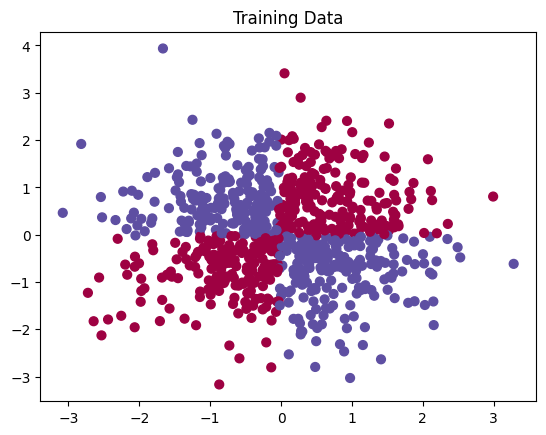

Starting Cross-Validation...
Epoch 10/100, Loss: 0.6888
Epoch 20/100, Loss: 0.6942
Epoch 30/100, Loss: 0.6850
Epoch 40/100, Loss: 0.6280
Epoch 50/100, Loss: 0.5031
Epoch 60/100, Loss: 0.3593
Epoch 70/100, Loss: 0.3106
Epoch 80/100, Loss: 0.1969
Epoch 90/100, Loss: 0.2112
Epoch 100/100, Loss: 0.1871
Epoch 1: [-0.0006974642466531541, 0.003845824250081483, 0.49996677890265967, 0.15621677890265964]
Epoch 2: [0.00036274427541799345, 0.004139287908216949, 0.4979882502235327, -0.06451174977646724]
Epoch 3: [-0.001301333044075532, 0.005197635506208895, 0.4988186120104968, -0.001181387989503152]
Epoch 4: [0.0004887930632085045, 0.0048729516246529495, 0.4988145791996037, -0.09493542080039633]
Epoch 5: [0.0008206359227787366, 0.005007389746810307, 0.5000031396488706, 0.09375313964887058]
Epoch 6: [-0.00013311289011675833, 0.004429977025872738, 0.4988434824598653, -0.06365651754013471]
Epoch 7: [0.00012301195214609002, 0.004974437594745805, 0.4996289421723622, -0.06287105782763777]
Epoch 8: [0.000

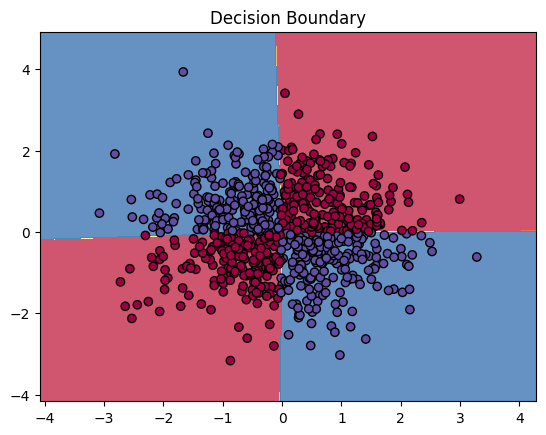

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import KFold

# Load XOR toy dataset
file_path = r"C:\Users\zoepo\Downloads\xordata (5).pkl"
with open(file_path, 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']

# input normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Plot training data
plt.scatter(X_train[:, 0], X_train[:, 1], s=40, c=y_train, cmap=plt.cm.Spectral)
plt.title("Training Data")
plt.show()

# Parameters
input_dim = X_train.shape[1]  # Number of input features (specify the number of nodes)
hidden_dim = 20               # Number of hidden units, this is a hyperparameter
output_dim = 1                # Binary output (specify the number of nodes)
learning_rate = 0.05
batch_size = 32
epochs = 100

# Use ReLu as Activation function for hidden layer
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z): #derivative of ReLU is used during backpropagation for gradient computation
    return (z > 0).astype(float)

def sigmoid(z): #sigmoid function is used for the output layer
    return 1 / (1 + np.exp(-z))

# cross-entropy Loss function
def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    return -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

# Training loop

def train(X_train, y_train, epochs, batch_size, learning_rate):
    global W1, b1, W2, b2
    m = X_train.shape[0]


    results = []

    for epoch in range(epochs):
        indices = np.arange(m)
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        for i in range(0, m, batch_size): #implements mini-batch SGD by splitting the training data into batches during each epoch
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size].reshape(-1, 1)

            # Forward pass
            Z1 = np.dot(X_batch, W1) + b1
            A1 = relu(Z1) #hidden layer activation
            Z2 = np.dot(A1, W2) + b2
            A2 = sigmoid(Z2) #output layer activation

            # Loss computation for cross entropy loss
            loss = cross_entropy_loss(y_batch, A2)

            # Backward pass
            dZ2 = A2 - y_batch
            dW2 = np.dot(A1.T, dZ2) / batch_size
            db2 = np.sum(dZ2, axis=0, keepdims=True) / batch_size

            #Propagating Gradients to the Hidden Layer
            dA1 = np.dot(dZ2, W2.T)
            dZ1 = dA1 * relu_derivative(Z1)
            dW1 = np.dot(X_batch.T, dZ1) / batch_size
            db1 = np.sum(dZ1, axis=0, keepdims=True) / batch_size

            # Update weights and biases w1 and b1 are for Hidden layer and w2 and b2 are for output layer 
            #weights and biases are updated using SGD
            W1 -= learning_rate * dW1
            b1 -= learning_rate * db1
            W2 -= learning_rate * dW2
            b2 -= learning_rate * db2

            # Collect arrays for printing in the specified format
            results.append([
                np.mean(Z1),  # Mean of Z1
                np.mean(A1),  # Mean of A1
                np.mean(A2),  # Mean of A2
                np.mean(dZ2)  # Mean of dZ2
            ])

        # Monitor loss every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    # Print collected arrays in the specified format
    for epoch_idx, result in enumerate(results[:10]):  # Adjust to show all or just the first few results
        print(f"Epoch {epoch_idx + 1}: {result}")


# Evaluation function
def evaluate(X, y):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    predictions = (A2 > 0.5).astype(int)
    print(classification_report(y, predictions))
    return predictions

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Spectral)
    plt.title("Decision Boundary")
    plt.show()


if __name__ == "__main__":
    # Cross-validation
    print("Starting Cross-Validation...")
    k = 5  # Number of folds for Cross-validation setup
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    fold_accuracies = []

    #iterates over the training and validation splits provided by KFold
    for train_index, val_index in kf.split(X_train):
        # Split data into training and validation sets
        X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

        # Reinitialize weights and biases for each fold
        W1 = np.random.randn(input_dim, hidden_dim) * 0.01
        b1 = np.zeros((1, hidden_dim))
        W2 = np.random.randn(hidden_dim, output_dim) * 0.01
        b2 = np.zeros((1, output_dim))

        # Train on the current fold
        train(X_fold_train, y_fold_train, epochs, batch_size, learning_rate)

        # Validate on the validation set for the current fold
        Z1_val = np.dot(X_fold_val, W1) + b1
        A1_val = relu(Z1_val)
        Z2_val = np.dot(A1_val, W2) + b2
        A2_val = sigmoid(Z2_val)
        predictions_val = (A2_val > 0.5).astype(int)

        # Compute accuracy for the current fold
        accuracy = accuracy_score(y_fold_val, predictions_val)
        fold_accuracies.append(accuracy)

    #Calculating and Displaying Cross-Validation Results
    print(f"Cross-Validation Accuracy: {np.mean(fold_accuracies):.4f} ± {np.std(fold_accuracies):.4f}")

    # Train on the full training set
    print("Training on the full training set...")
    W1 = np.random.randn(input_dim, hidden_dim) * 0.01 #Random initialization of weights in hidden layer using a normal distribution scaled by 0.01
    b1 = np.zeros((1, hidden_dim)) #Biases for the Hidden Layer Initialized to zeros
    W2 = np.random.randn(hidden_dim, output_dim) * 0.01 #Random initialization of weights in output layer using a normal distribution scaled by 0.01
    b2 = np.zeros((1, output_dim)) #Biases for the output Layer Initialized to zeros
    train(X_train, y_train, epochs, batch_size, learning_rate)

    # Provide a classification report of the performance on the train and test set
    print("Performance on Training Set:")
    evaluate(X_train, y_train)


    print("Performance on Test Set:")
    evaluate(X_test, y_test)

    plot_decision_boundary(X_train, y_train, lambda x: (sigmoid(np.dot(relu(np.dot(x, W1) + b1), W2) + b2) > 0.5).astype(int))

